In [2]:
using NCDatasets
using PyPlot
using DataArrays
using PyCall

In [3]:
@pyimport numpy.ma as ma
pyma(S) = pycall(ma.array, Any, S.data, mask=S.na)
pcol(x,y,z::DataArray; kws...) = pcolor(x,y,pyma(z); kws...)

pcol (generic function with 1 method)

In [4]:
Phnc = Dataset("http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%2010-years%20running%20averages/Water_body_phosphate.4Danl.nc")

Dataset: http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%2010-years%20running%20averages/Water_body_phosphate.4Danl.nc
Group: /

Dimensions
   depth = 21
   idlen = 35
   lat = 130
   lon = 216
   maxStrlen64 = 64
   nv = 2
   observations = 772156
   time = 46

Variables
  lon   (216)
    Datatype:    Float32
    Dimensions:  lon
    Attributes:
     units                = degrees_east

  lat   (130)
    Datatype:    Float32
    Dimensions:  lat
    Attributes:
     units                = degrees_north

  depth   (21)
    Datatype:    Float32
    Dimensions:  depth
    Attributes:
     units                = meters
     positive             = down

  time   (46)
    Datatype:    Float32
    Dimensions:  time
    Attributes:
     units                = Days since 1960-01-01
     climatology          = climatology_bounds

  climatology_bounds   (2 × 46)
    Datatype:    Float32
    Dimensions:  nv × time
    Attributes:
     climatolog

In [5]:
Phlon = Phnc["lon"][:];
Phlat = Phnc["lat"][:];
Phtime = Phnc["time"][:];


In [6]:
Dates.year(Phtime[1])

1965

In [7]:
Dates.month(Phtime[1])

10

In [8]:
n = find(Dates.year.(Phtime) .== 2000)[1]

36

In [9]:
phosphate = Phnc["Water_body_phosphate"][:,:,end,n];


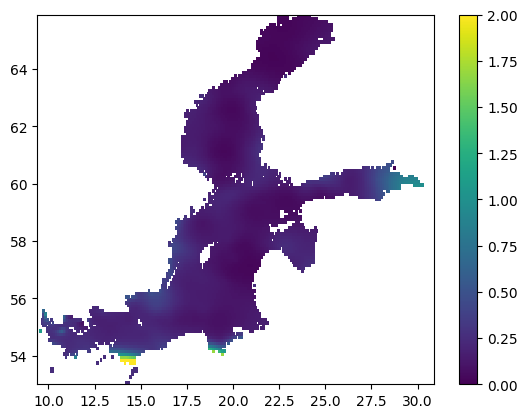

In [10]:
pcol(Phlon,Phlat,phosphate');colorbar(); clim(0,2)

In [11]:
Nnc = Dataset("http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%2010-years%20running%20averages/Water_body_nitrate.4Danl.nc")

Dataset: http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%2010-years%20running%20averages/Water_body_nitrate.4Danl.nc
Group: /

Dimensions
   depth = 21
   idlen = 26
   lat = 130
   lon = 216
   maxStrlen64 = 64
   nv = 2
   observations = 416380
   time = 46

Variables
  lon   (216)
    Datatype:    Float32
    Dimensions:  lon
    Attributes:
     units                = degrees_east

  lat   (130)
    Datatype:    Float32
    Dimensions:  lat
    Attributes:
     units                = degrees_north

  depth   (21)
    Datatype:    Float32
    Dimensions:  depth
    Attributes:
     units                = meters
     positive             = down

  time   (46)
    Datatype:    Float32
    Dimensions:  time
    Attributes:
     units                = Days since 1960-01-01
     climatology          = climatology_bounds

  climatology_bounds   (2 × 46)
    Datatype:    Float32
    Dimensions:  nv × time
    Attributes:
     climatology_

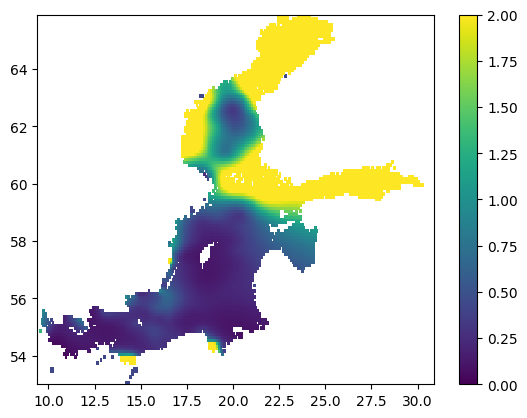

In [12]:
Nlon = Nnc["lon"][:];
Nlat = Nnc["lat"][:];
Ntime = Nnc["time"][:];
n = find(Dates.year.(Ntime) .== 2000)[1]
nitrate = Nnc["Water_body_nitrate"][:,:,end,n];

pcol(Nlon,Nlat,nitrate');colorbar(); clim(0,2)


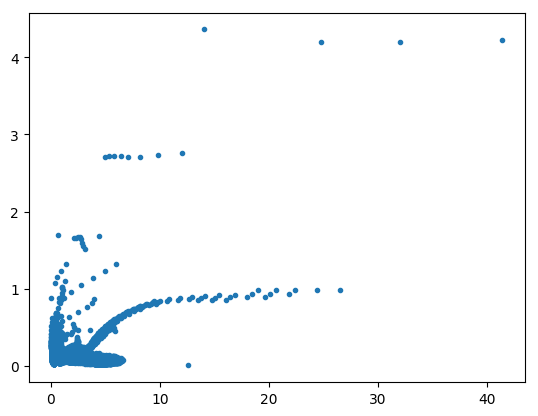

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe20d771410>

In [13]:
size(nitrate[:])
size(phosphate[:])

valid = .!isna.(nitrate[:]) .& .!isna.(phosphate[:])

plot(nitrate[valid].data,phosphate[valid].data,".")
